# 特征预处理

## 数值型特征无量纲化

### 标准化 （z-分数标准化）

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False  ## 解决坐标轴刻度负号乱码
plt.rcParams['font.sans-serif'] = ['Simhei']  # 设置中文显示，KaiTi，FangSong
from sklearn.datasets import load_iris
iris = load_iris()
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [2]:
iris.feature_names  #特征

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
iris.target  #标签

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### 标准化操作

In [4]:
from sklearn.preprocessing import StandardScaler
#标准化，返回值为标准化后的数据
std=StandardScaler()
data_std=std.fit_transform(iris.data)

In [9]:
std=StandardScaler()
std.fit(iris.data) #求均值，求标准差
std.transform(iris.data).mean(axis=0)

array([-1.69031455e-15, -1.84297022e-15, -1.69864123e-15, -1.40924309e-15])

In [6]:
data_std.mean(axis=0)  #标准化后的数据 均值为零

array([-1.69031455e-15, -1.84297022e-15, -1.69864123e-15, -1.40924309e-15])

In [7]:
data_std.std(axis=0)  #标准差为1

array([1., 1., 1., 1.])

#### 训练和测试集如何处理

In [ ]:
#训练集和测试情况
std=StandardScaler()
std.fit_transform(训练集)
std.transform(测试集)

#### 绘图

Text(0, 0.5, '频率')

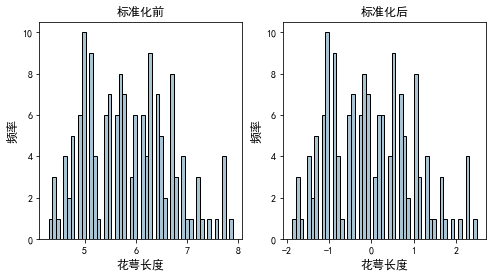

In [10]:
fig, ax = plt.subplots(1,2,figsize=(8, 4))
#第一个子图，标准化前
pd.Series(iris.data[:,0]).hist(bins=50, color='#A9C5D3', 
                             edgecolor='black', grid=False,ax=ax[0])
ax[0].set_title('标准化前', fontsize=12)
ax[0].set_xlabel('花萼长度', fontsize=12)
ax[0].set_ylabel('频率', fontsize=12)

std=StandardScaler()
std_data=std.fit_transform(iris.data)

#第二个子图，标准化后
pd.Series(std_data[:,0]).hist(bins=50, color='#A9C5D3', 
                             edgecolor='black', grid=False,ax=ax[1])
ax[1].set_title('标准化后', fontsize=12)
ax[1].set_xlabel('花萼长度', fontsize=12)
ax[1].set_ylabel('频率', fontsize=12)

### 区间缩放法

In [11]:
from sklearn.preprocessing import MinMaxScaler
#区间缩放，默认值为缩放到[0, 1]区间的数据
MinMaxScaler().fit_transform(iris.data)

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [12]:
#可以缩放到其他区间
MinMaxScaler(feature_range=(1, 2)).fit_transform(iris.data)

array([[1.22222222, 1.625     , 1.06779661, 1.04166667],
       [1.16666667, 1.41666667, 1.06779661, 1.04166667],
       [1.11111111, 1.5       , 1.05084746, 1.04166667],
       [1.08333333, 1.45833333, 1.08474576, 1.04166667],
       [1.19444444, 1.66666667, 1.06779661, 1.04166667],
       [1.30555556, 1.79166667, 1.11864407, 1.125     ],
       [1.08333333, 1.58333333, 1.06779661, 1.08333333],
       [1.19444444, 1.58333333, 1.08474576, 1.04166667],
       [1.02777778, 1.375     , 1.06779661, 1.04166667],
       [1.16666667, 1.45833333, 1.08474576, 1.        ],
       [1.30555556, 1.70833333, 1.08474576, 1.04166667],
       [1.13888889, 1.58333333, 1.10169492, 1.04166667],
       [1.13888889, 1.41666667, 1.06779661, 1.        ],
       [1.        , 1.41666667, 1.01694915, 1.        ],
       [1.41666667, 1.83333333, 1.03389831, 1.04166667],
       [1.38888889, 2.        , 1.08474576, 1.125     ],
       [1.30555556, 1.79166667, 1.05084746, 1.125     ],
       [1.22222222, 1.625     ,

Text(0, 0.5, '频率')

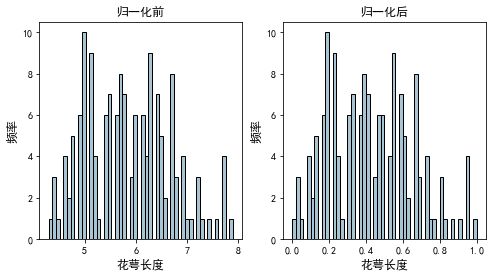

In [25]:
fig, ax = plt.subplots(1,2,figsize=(8, 4))
#第一个子图，归一化前
pd.Series(iris.data[:,0]).hist(bins=50, color='#A9C5D3', 
                             edgecolor='black', grid=False,ax=ax[0])
ax[0].set_title('归一化前', fontsize=12)
ax[0].set_xlabel('花萼长度', fontsize=12)
ax[0].set_ylabel('频率', fontsize=12)

Mim_data=MinMaxScaler().fit_transform(iris.data)

#第二个子图，归一化后
pd.Series(Mim_data[:,0]).hist(bins=50, color='#A9C5D3', 
                             edgecolor='black', grid=False,ax=ax[1])
ax[1].set_title('归一化后', fontsize=12)
ax[1].set_xlabel('花萼长度', fontsize=12)
ax[1].set_ylabel('频率', fontsize=12)

### 正则化

In [26]:
from sklearn.preprocessing import Normalizer
Normalizer(norm='l2').fit_transform(iris.data)#默认为l2

array([[0.80377277, 0.55160877, 0.22064351, 0.0315205 ],
       [0.82813287, 0.50702013, 0.23660939, 0.03380134],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949],
       [0.80003025, 0.53915082, 0.26087943, 0.03478392],
       [0.790965  , 0.5694948 , 0.2214702 , 0.0316386 ],
       [0.78417499, 0.5663486 , 0.2468699 , 0.05808704],
       [0.78010936, 0.57660257, 0.23742459, 0.0508767 ],
       [0.80218492, 0.54548574, 0.24065548, 0.0320874 ],
       [0.80642366, 0.5315065 , 0.25658935, 0.03665562],
       [0.81803119, 0.51752994, 0.25041771, 0.01669451],
       [0.80373519, 0.55070744, 0.22325977, 0.02976797],
       [0.786991  , 0.55745196, 0.26233033, 0.03279129],
       [0.82307218, 0.51442011, 0.24006272, 0.01714734],
       [0.8025126 , 0.55989251, 0.20529392, 0.01866308],
       [0.81120865, 0.55945424, 0.16783627, 0.02797271],
       [0.77381111, 0.59732787, 0.2036345 , 0.05430253],
       [0.79428944, 0.57365349, 0.19121783, 0.05883625],
       [0.80327412, 0.55126656,

In [27]:
Normalizer(norm='l1').fit_transform(iris.data)#l1正则化

array([[0.5       , 0.34313725, 0.1372549 , 0.01960784],
       [0.51578947, 0.31578947, 0.14736842, 0.02105263],
       [0.5       , 0.34042553, 0.13829787, 0.0212766 ],
       [0.4893617 , 0.32978723, 0.15957447, 0.0212766 ],
       [0.49019608, 0.35294118, 0.1372549 , 0.01960784],
       [0.47368421, 0.34210526, 0.14912281, 0.03508772],
       [0.4742268 , 0.35051546, 0.1443299 , 0.03092784],
       [0.4950495 , 0.33663366, 0.14851485, 0.01980198],
       [0.49438202, 0.3258427 , 0.15730337, 0.02247191],
       [0.51041667, 0.32291667, 0.15625   , 0.01041667],
       [0.5       , 0.34259259, 0.13888889, 0.01851852],
       [0.48      , 0.34      , 0.16      , 0.02      ],
       [0.51612903, 0.32258065, 0.15053763, 0.01075269],
       [0.50588235, 0.35294118, 0.12941176, 0.01176471],
       [0.51785714, 0.35714286, 0.10714286, 0.01785714],
       [0.475     , 0.36666667, 0.125     , 0.03333333],
       [0.49090909, 0.35454545, 0.11818182, 0.03636364],
       [0.49514563, 0.33980583,

## 数值型特征分箱

### 自定义分箱

In [35]:
df = pd.DataFrame([[40,1],[13,1],[33,1],[52,0],[16,0],[42,1],[53,1],[39,1],[26,0],[66,0]],
                  columns=['年龄','性别'])
df

,年龄,性别
0,40,1
1,13,1
2,33,1
3,52,0
4,16,0
5,42,1
6,53,1
7,39,1
8,26,0
9,66,0


In [39]:
bins=[0,10,40,60,80]
df['自定义分箱'] =pd.cut(df['年龄'],bins=bins)  #左开右闭
df

,年龄,性别,自定义分箱
0,40,1,"(10, 40]"
1,13,1,"(10, 40]"
2,33,1,"(10, 40]"
3,52,0,"(40, 60]"
4,16,0,"(10, 40]"
5,42,1,"(40, 60]"
6,53,1,"(40, 60]"
7,39,1,"(10, 40]"
8,26,0,"(10, 40]"
9,66,0,"(60, 80]"


In [41]:
bins=[0,10,40,60,80]
df['自定义分箱'] =pd.cut(df['年龄'],bins=bins,labels=['少年','青年','壮年','老年'])
df

,年龄,性别,自定义分箱
0,40,1,青年
1,13,1,青年
2,33,1,青年
3,52,0,壮年
4,16,0,青年
5,42,1,壮年
6,53,1,壮年
7,39,1,青年
8,26,0,青年
9,66,0,老年


### 等距分箱

In [43]:
pd.cut?

In [42]:
df['等距分箱'] = pd.cut(df['年龄'],3)  
df

,年龄,性别,自定义分箱,等距分箱
0,40,1,青年,"(30.667, 48.333]"
1,13,1,青年,"(12.947, 30.667]"
2,33,1,青年,"(30.667, 48.333]"
3,52,0,壮年,"(48.333, 66.0]"
4,16,0,青年,"(12.947, 30.667]"
5,42,1,壮年,"(30.667, 48.333]"
6,53,1,壮年,"(48.333, 66.0]"
7,39,1,青年,"(30.667, 48.333]"
8,26,0,青年,"(12.947, 30.667]"
9,66,0,老年,"(48.333, 66.0]"


### 等频分箱

In [45]:
df['等频分箱'] = pd.qcut(df['年龄'],3)  
df

,年龄,性别,自定义分箱,等距分箱,等频分箱
0,40,1,青年,"(30.667, 48.333]","(33.0, 42.0]"
1,13,1,青年,"(12.947, 30.667]","(12.999, 33.0]"
2,33,1,青年,"(30.667, 48.333]","(12.999, 33.0]"
3,52,0,壮年,"(48.333, 66.0]","(42.0, 66.0]"
4,16,0,青年,"(12.947, 30.667]","(12.999, 33.0]"
5,42,1,壮年,"(30.667, 48.333]","(33.0, 42.0]"
6,53,1,壮年,"(48.333, 66.0]","(42.0, 66.0]"
7,39,1,青年,"(30.667, 48.333]","(33.0, 42.0]"
8,26,0,青年,"(12.947, 30.667]","(12.999, 33.0]"
9,66,0,老年,"(48.333, 66.0]","(42.0, 66.0]"


In [46]:
df['等频分箱'].value_counts()   #统计分箱后的结果

(12.999, 33.0]    4
(42.0, 66.0]      3
(33.0, 42.0]      3
Name: 等频分箱, dtype: int64

### 聚类分箱

In [61]:
from sklearn.cluster import KMeans
kmodel=KMeans(n_clusters=3)    #k为聚成几类
kmodel.fit(data.reshape(-1,1)) #训练模型
c=pd.DataFrame(kmodel.cluster_centers_) #求聚类中心
c=c.sort_values(by=0) #排序　　
w=c.rolling(window=2).mean().iloc[1:] #用滑动窗口求均值的方法求相邻两项求中点，作为边界点
w=[data.min()-0.1] +list(w[0]) + [data.max()]#把首末边界点加上
df['聚类分箱'] = pd.cut(data,w)
df

,年龄,性别,自定义分箱,等距分箱,等频分箱,聚类分箱
0,40,1,青年,"(30.667, 48.333]","(33.0, 42.0]","(28.417, 47.75]"
1,13,1,青年,"(12.947, 30.667]","(12.999, 33.0]","(12.9, 28.417]"
2,33,1,青年,"(30.667, 48.333]","(12.999, 33.0]","(28.417, 47.75]"
3,52,0,壮年,"(48.333, 66.0]","(42.0, 66.0]","(47.75, 66.0]"
4,16,0,青年,"(12.947, 30.667]","(12.999, 33.0]","(12.9, 28.417]"
5,42,1,壮年,"(30.667, 48.333]","(33.0, 42.0]","(28.417, 47.75]"
6,53,1,壮年,"(48.333, 66.0]","(42.0, 66.0]","(47.75, 66.0]"
7,39,1,青年,"(30.667, 48.333]","(33.0, 42.0]","(28.417, 47.75]"
8,26,0,青年,"(12.947, 30.667]","(12.999, 33.0]","(12.9, 28.417]"
9,66,0,老年,"(48.333, 66.0]","(42.0, 66.0]","(47.75, 66.0]"


### 二值化

In [70]:
from sklearn.preprocessing import Binarizer
#二值化，阈值设置为3，小于等于3为0，大于3为1
#返回值为二值化后的数据
Binarizer(threshold=3).fit_transform(iris.data)   #一个阈值对所有的特征

array([[1., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 1., 0., 0.],


In [55]:
Binarizer(threshold=[5,3,1.5,0.2]).fit_transform(iris.data) #不同的列用不同阈值二值化

array([[1., 1., 0., 0.],
       [0., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 1., 1., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 1., 0., 0.],
       [0., 1., 1., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 1.],
       [1., 1., 0., 1.],
       [1., 1., 0., 1.],
       [1., 1., 1., 1.],
       [1., 1., 0., 1.],
       [1., 1., 1., 0.],
       [1., 1., 0., 1.],
       [0., 1., 0., 0.],
       [1., 1., 1., 1.],
       [0., 1., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 1., 1.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [1., 1., 0., 1.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 0.],
       [1., 1., 0., 0.],


## 分类特征编码

### LabelEncoder：线性编码方式

In [81]:
from sklearn.preprocessing import LabelEncoder
Lab=LabelEncoder()
Lab.fit_transform(['a','c','b','d'])   #0,1,2,3    unicode编码顺序

array([0, 2, 1, 3], dtype=int64)

In [82]:
Lab.transform(['a','c','d'])

array([0, 2, 3], dtype=int64)

In [76]:
ord('c')

99

In [73]:
LabelEncoder().fit_transform(['青年','中年','老年','青年'])   #0,1,2,3    unicode编码顺序

array([2, 0, 1, 2], dtype=int64)

In [88]:
#dataframe进行编码
import pandas as pd
df=pd.DataFrame([['a','青年'],['b','中年'],['c','老年']],columns=['X','Y'])
df

,X,Y
0,a,青年
1,b,中年
2,c,老年


In [89]:
le = LabelEncoder()
for col in df.columns:
    df[col]=le.fit_transform(df[col]) #每一列单独处理
    print(col,le.classes_)            #查看编码顺序
df

X ['a' 'b' 'c']
Y ['中年' '老年' '青年']


,X,Y
0,0,2
1,1,0
2,2,1


In [91]:
df=pd.DataFrame([['a','青年'],['b','中年'],['c','老年']],columns=['X','Y'])
df

,X,Y
0,a,青年
1,b,中年
2,c,老年


In [92]:
df['Y'].map({'青年':0,'中年':1,'老年':2})  #手动编码

0    0
1    1
2    2
Name: Y, dtype: int64

### 哑编码：非线性编码

#### get_dummies

In [94]:
list2=[[1, 'B', 'C'], [4, 'C', 'A'], [5, 'A', 'B']]
df1=pd.DataFrame(list2,columns=['P1','P2','P3'])
df1

,P1,P2,P3
0,1,B,C
1,4,C,A
2,5,A,B


In [96]:
pd.get_dummies(df1,prefix=['P2','P3'])

,P1,P2_A,P2_B,P2_C,P3_A,P3_B,P3_C
0,1,0,1,0,0,0,1
1,4,0,0,1,1,0,0
2,5,1,0,0,0,1,0


In [97]:
pd.get_dummies(df1,prefix=['P2','P3'],drop_first=True)  #丢掉第一列

,P1,P2_B,P2_C,P3_B,P3_C
0,1,1,0,0,1
1,4,0,1,0,0
2,5,0,0,1,0


#### OneHotEncoder

In [98]:
from sklearn.preprocessing import OneHotEncoder
list2=[['A', 'B', 'C'], ['B', 'C', 'A'], ['C', 'A', 'B']]
One_hot=OneHotEncoder()
One_hot.fit_transform(list2) #稀疏矩阵的形式存储，很多模型支持稀疏矩阵

<3x9 sparse matrix of type '<class 'numpy.float64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [99]:
OneHotEncoder().fit_transform(list2).toarray() #查看内部数据值

array([[1., 0., 0., 0., 1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 1., 1., 0., 0.],
       [0., 0., 1., 1., 0., 0., 0., 1., 0.]])

In [76]:
OneHotEncoder(drop='first').fit_transform(list2) #drop参数

<3x6 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [77]:
OneHotEncoder(drop='first').fit_transform(list2).toarray()

array([[0., 0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 1., 0.]])

## 统计变换

### Log变换

In [2]:
#数据集：freeCodeCamp 做了一个名为coder-survey的调研，以了解成年人学写代码的状况
data = pd.read_csv('2016-new-coder-survey.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Columns: 113 entries, Age to StudentDebtOwe
dtypes: float64(87), object(26)
memory usage: 302.0+ KB


Text(0, 0.5, '频数')

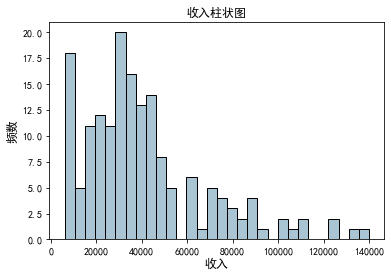

In [80]:
fig, ax = plt.subplots()
data['Income'].hist(bins=30, color='#A9C5D3', 
                             edgecolor='black', grid=False)
ax.set_title('收入柱状图', fontsize=12)
ax.set_xlabel('收入', fontsize=12)
ax.set_ylabel('频数', fontsize=12)

In [3]:
data['Income_log'] = np.log((1+ data['Income'])) #log变换

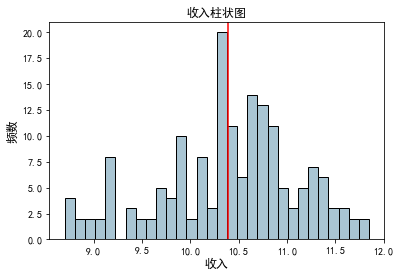

In [4]:
income_log_mean = np.mean(data['Income_log'])
fig, ax = plt.subplots()
data['Income_log'].hist(bins=30, color='#A9C5D3', 
                                 edgecolor='black', grid=False)
plt.axvline(income_log_mean, color='r')
ax.set_title('收入柱状图', fontsize=12)
ax.set_xlabel('收入', fontsize=12)
ax.set_ylabel('频数', fontsize=12);

### Box-Cox变换

In [5]:
import scipy.stats as spstats
# 从数据分布中移除非零值
income = np.array(data['Income'])
income_clean = income[~np.isnan(income)]
# 计算最佳λ值
l, opt_lambda = spstats.boxcox(income_clean)
print('Optimal lambda value:', opt_lambda) #最大似然估计原理
# 进行Box-Cox变换
data['Income_boxcox_lambda_opt'] = spstats.boxcox(data['Income'],lmbda=opt_lambda)

Optimal lambda value: 0.2108445517837084


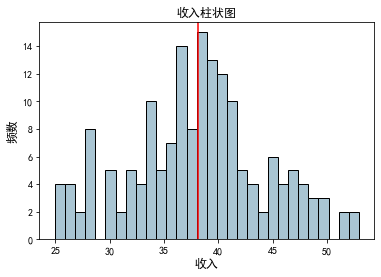

In [6]:
income_boxcox_mean = np.mean(data['Income_boxcox_lambda_opt'])
fig, ax = plt.subplots()
data['Income_boxcox_lambda_opt'].hist(bins=30, 
                     color='#A9C5D3', edgecolor='black', grid=False)
plt.axvline(income_boxcox_mean, color='r')
ax.set_title('收入柱状图', fontsize=12)
ax.set_xlabel('收入', fontsize=12)
ax.set_ylabel('频数', fontsize=12);

## 特征交叉

### 连续特征交叉

In [7]:
iris.data.shape

(150, 4)

In [10]:
from sklearn.preprocessing import PolynomialFeatures
PolynomialFeatures(degree=2).fit_transform(iris.data)

array([[ 1.  ,  5.1 ,  3.5 , ...,  1.96,  0.28,  0.04],
       [ 1.  ,  4.9 ,  3.  , ...,  1.96,  0.28,  0.04],
       [ 1.  ,  4.7 ,  3.2 , ...,  1.69,  0.26,  0.04],
       ...,
       [ 1.  ,  6.5 ,  3.  , ..., 27.04, 10.4 ,  4.  ],
       [ 1.  ,  6.2 ,  3.4 , ..., 29.16, 12.42,  5.29],
       [ 1.  ,  5.9 ,  3.  , ..., 26.01,  9.18,  3.24]])

In [94]:
#表示去掉平方项，只保留交叉项
PolynomialFeatures(degree=2,interaction_only=True).fit_transform(iris.data).shape

(150, 11)

In [25]:
#把偏置项去掉
PolynomialFeatures(degree=2,interaction_only=True,include_bias=False).fit_transform(iris.data).shape

(150, 10)

### 离散特征交叉

In [11]:
df = pd.DataFrame([['青年','男'],['中年','女'],['老年','男'],['老年','女']],columns=['年龄','性别'])
df

,年龄,性别
0,青年,男
1,中年,女
2,老年,男
3,老年,女


In [12]:
df['年龄-性别']=df['年龄']+df['性别']
df

,年龄,性别,年龄-性别
0,青年,男,青年男
1,中年,女,中年女
2,老年,男,老年男
3,老年,女,老年女


In [ ]:
#如何对新特征编码

In [14]:
df1=pd.DataFrame(df['年龄'].unique(),columns=['年龄'])
df1['key']=1
df1

,年龄,key
0,青年,1
1,中年,1
2,老年,1


In [15]:
df2=pd.DataFrame(df['性别'].unique(),columns=['性别'])
df2['key']=1
df2

,性别,key
0,男,1
1,女,1


In [16]:
df1=pd.DataFrame(df['年龄'].unique(),columns=['年龄'])
df1['key']=1
df2=pd.DataFrame(df['性别'].unique(),columns=['性别'])
df2['key']=1
df_12=pd.merge(df1,df2,on='key')
df_12

,年龄,key,性别
0,青年,1,男
1,青年,1,女
2,中年,1,男
3,中年,1,女
4,老年,1,男
5,老年,1,女


In [17]:
df_12['年龄-性别']=df_12['年龄']+df_12['性别']
df_12

,年龄,key,性别,年龄-性别
0,青年,1,男,青年男
1,青年,1,女,青年女
2,中年,1,男,中年男
3,中年,1,女,中年女
4,老年,1,男,老年男
5,老年,1,女,老年女


In [18]:
from sklearn.preprocessing import LabelEncoder
Lab=LabelEncoder()
Lab.fit_transform(df_12['年龄-性别'])

array([5, 4, 1, 0, 3, 2])

In [21]:
df['年龄-性别']=Lab.transform(df['年龄-性别'])
df

,年龄,性别,年龄-性别
0,青年,男,5
1,中年,女,0
2,老年,男,3
3,老年,女,2
